## Day 27 Lecture 2 Assignment

In this assignment, we will learn about interpreting linear models. We will use the google play store dataset loaded below and analyze the regression from this dataset.

In [1]:
%matplotlib inline
%reload_ext nb_black
import warnings

import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer

import seaborn as sns
import matplotlib.pyplot as plt


<IPython.core.display.Javascript object>

In [2]:
def print_vif(x):
    """Utility for checking multicollinearity assumption
    
    :param x: input features to check using VIF. This is assumed to be a pandas.DataFrame
    :return: nothing is returned the VIFs are printed as a pandas series
    """
    # Silence numpy FutureWarning about .ptp
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        x = sm.add_constant(x)

    vifs = []
    for i in range(x.shape[1]):
        vif = variance_inflation_factor(x.values, i)
        vifs.append(vif)

    print("VIF results\n-------------------------------")
    print(pd.Series(vifs, index=x.columns))
    print("-------------------------------\n")

<IPython.core.display.Javascript object>

In [3]:
reviews = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv"
)

<IPython.core.display.Javascript object>

In [4]:
reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<IPython.core.display.Javascript object>

We will predict app ratings using other features describing the app. Recall from the previous assignment our data cleansing steps and do the following:

1. Remove the following columns: app, category, size, installs, genres, last updated, current ver, android ver
2. Convert all columns to numeric and remove rows where this conversion causes null values
3. Split the data into test and train subsets with 20% of the data in the test set
4. Normalize the data with QuantileTransformer. Many of the features are highly skewed.

In [5]:
# answer below:
reviews = reviews.drop(
    columns=[
        "App",
        "Category",
        "Size",
        "Installs",
        "Genres",
        "Last Updated",
        "Current Ver",
        "Android Ver",
    ]
)
reviews = reviews.dropna()
reviews.shape

(9366, 5)

<IPython.core.display.Javascript object>

In [6]:
reviews["Price"] = reviews["Price"].str.strip("$")
reviews["Price"] = pd.to_numeric(reviews["Price"])
reviews["Reviews"] = pd.to_numeric(reviews["Reviews"])

<IPython.core.display.Javascript object>

In [7]:
reviews["is_free"] = reviews["Type"] == "Free"
reviews["is_free"] = reviews["is_free"].astype(int)
reviews = reviews.drop(columns=("Type"))

<IPython.core.display.Javascript object>

In [8]:
reviews = reviews[~reviews["Content Rating"].isin(["Adults only 18+", "Unrated"])]
content_rating_map = {"Everyone": 0, "Everyone 10+": 1, "Teen": 2, "Mature 17+": 3}
reviews["Content Rating"] = reviews["Content Rating"].replace(content_rating_map)

<IPython.core.display.Javascript object>

In [9]:
reviews["Price"] = reviews[reviews["Price"] < 30]

<IPython.core.display.Javascript object>

In [10]:
print(reviews.shape)
reviews.head(2)

(9362, 5)


,Rating,Reviews,Price,Content Rating,is_free
0,4.1,159,4.1,0,1
1,3.9,967,3.9,0,1


<IPython.core.display.Javascript object>

In [23]:
reviews = reviews.fillna(method="ffill")
X = reviews.drop(columns="Rating")
y = reviews["Rating"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=55
)

<IPython.core.display.Javascript object>

In [24]:
transformer = QuantileTransformer()
transformer.fit(X_train)

X_train_scl = transformer.transform(X_train)

X_test_scl = transformer.transform(X_test)

X_train = pd.DataFrame(X_train_scl, index=X_train.index, columns=X_train.columns)

X_test = pd.DataFrame(X_test_scl, index=X_test.index, columns=X_test.columns)

<IPython.core.display.Javascript object>

Create a linear regression model using statsmodels. Look at the coefficient values and their associated p values. Additionally, check model assumptions of homoscedacity, normality of errors, and multicollinearity.

In [25]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)


<IPython.core.display.Javascript object>

In [26]:
# answer below:
model = sm.OLS(y_train, X_train_const, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     6290.
Date:                Tue, 01 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:14:46   Log-Likelihood:                -183.75
No. Observations:                7489   AIC:                             377.5
Df Residuals:                    7484   BIC:                             412.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.3344      0.012    270.287      0.000       3.310       3.359
Reviews            0.1504      0.010     14.406      0.000       0.130       0.171
Price              1.5393      0.010    152.788      0.000       1.520       1.559
Content Rating     0.0269      0.008      3.371      0.001       0.011       0.042
is_free            0.0099      0.011      0.869      0.385      -0.012       0.032
==============================================================================
Omnibus:                     6484.816   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           238283.973
Skew:                          -4.056   Prob(JB):                         0.00
Kurtosis:                      29.416   Cond. No.                         8.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>

In [27]:
# Testing for homoscedacity
# from statsmodels.stats.diagnostic import het_breuschpagan

_, p, _, _ = het_breuschpagan(model.resid, X_train_const)
p

3.3309558055914974e-122

<IPython.core.display.Javascript object>

In [28]:
print_vif(X_train)

VIF results
-------------------------------
const             18.521219
Reviews            1.106393
Price              1.036434
Content Rating     1.034664
is_free            1.049776
dtype: float64
-------------------------------



<IPython.core.display.Javascript object>

In [29]:
X_train.corr()

,Reviews,Price,Content Rating,is_free
Reviews,1.000000,0.155367,0.177962,0.195716
Price,0.155367,1.000000,-0.014529,-0.063840
Content Rating,0.177962,-0.014529,1.000000,0.041804
is_free,0.195716,-0.063840,0.041804,1.000000


<IPython.core.display.Javascript object>

Using the information above, try to select only the variables you think will lead to a better model and construct that model. Print out a summary

In [ ]:
#answer below:



Plot the scatterplots between the independent variables you select and ratings. Do you think given these graphs, these variables have good predictive power? 

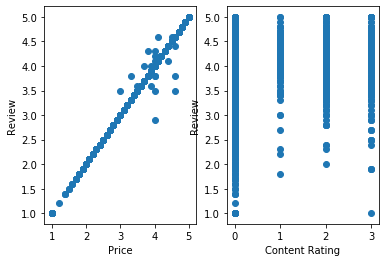

<IPython.core.display.Javascript object>

In [35]:
# answer below:
plt.subplot(1, 2, 1)
plt.scatter(reviews["Price"], y)
plt.xlabel("Price")
plt.ylabel("Review")

plt.subplot(1, 2, 2)
plt.scatter(reviews["Content Rating"], y)
plt.xlabel("Content Rating")
plt.ylabel("Review")
plt.show()

What data processing could you do to improve this model? Experiment.